In [1]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
#Information old customers
Old_customers = pd.read_excel('p1-customers.xlsx')
Old_customers

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2370,Joan Delisa,Credit Card Only,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1
2371,Helen Cordiner,Credit Card Only,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4
2372,Angela Finley,Credit Card Only,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4
2373,Christine Sullivan,Credit Card Only,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7


In [3]:
#informations on the new customers
New_customers = pd.read_excel('p1-mailinglist.xlsx')
New_customers

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706
...,...,...,...,...,...,...,...,...,...,...,...,...
245,Wanda Stiveson,Credit Card Only,1129,13080 W Montana Dr,Lakewood,CO,80228,107,18,0.3,0.783806,0.216194
246,Wendy Crenshaw,Loyalty Club Only,304,12483 W 8th Ave,Golden,CO,80401,106,3,0.6,0.807200,0.192800
247,Wendy Renaud,Loyalty Club Only,2629,700 S Alton Way,Denver,CO,80247,100,6,0.1,0.576544,0.423456
248,Wilma Reid,Credit Card Only,1917,6763 W Yale Ave,Lakewood,CO,80227,101,7,0.2,0.740749,0.259251


In [4]:
Old_customers.describe()

,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,1647.845474,80123.333474,399.774093,104.297684,3.347368,4.500632
std,962.728105,107.255770,340.115808,2.837240,2.738568,2.309986
min,2.000000,80002.000000,1.220000,100.000000,1.000000,1.000000
25%,820.500000,80014.000000,168.925000,101.000000,1.000000,2.000000
50%,1629.000000,80123.000000,281.320000,105.000000,3.000000,5.000000
75%,2492.500000,80221.000000,572.400000,107.000000,5.000000,6.000000
max,3335.000000,80640.000000,2963.490000,109.000000,26.000000,8.000000


Text(0.5, 1.0, 'Correlation Index')

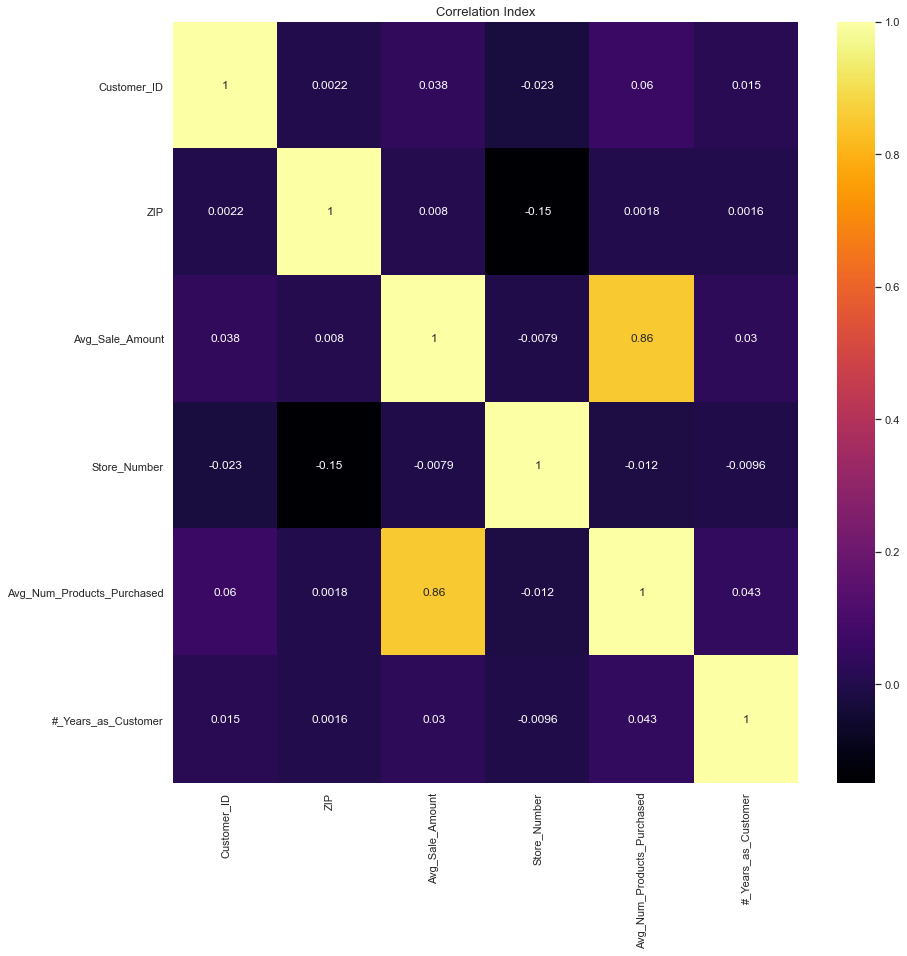

In [6]:
#Coorelation between numerical data to help with prediction
# correlation matrix
corr = Old_customers.corr()

plt.figure(figsize=(14,14))
tig = sns.heatmap(corr, annot = True, cmap= 'inferno')

tig.set_title('Correlation Index',fontsize= 13)
#This shows the correlation index between columns relationship with each other
# This is scaled on 0-1 with 1 the highest and 0 the lowest

> In the coorelation index above, only the Avg_Num_Products has a positive strong correlation or rscore with Avg_num_sales 

> Customer Id and years as customer also has postive correlation but they are weak having a value of 0.3 and 0.35 respectively.

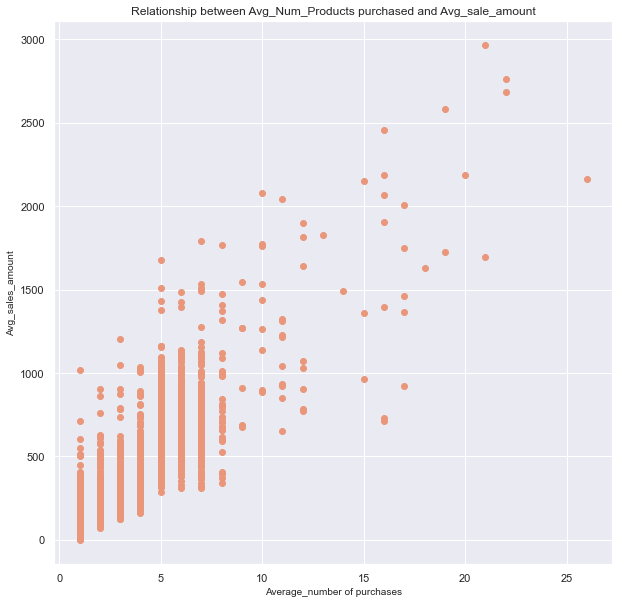

In [7]:
#by the correlation index only Avg_Num_Products purchased and Avg_sale_amount
plt.figure(figsize=(10,10))
plt.scatter(Old_customers.Avg_Num_Products_Purchased, Old_customers.Avg_Sale_Amount, c='darksalmon')
plt.xlabel('Average_number of purchases', fontsize= 10)
plt.ylabel('Avg_sales_amount',  fontsize= 10)
plt.title("Relationship between Avg_Num_Products purchased and Avg_sale_amount")
plt.show()


>From the scatter plot below we can say that as Avg_Num_Products purchased  increases, Avg_sale_amount also increases.

In [8]:
#initiating a linear regression model
lin = LinearRegression()

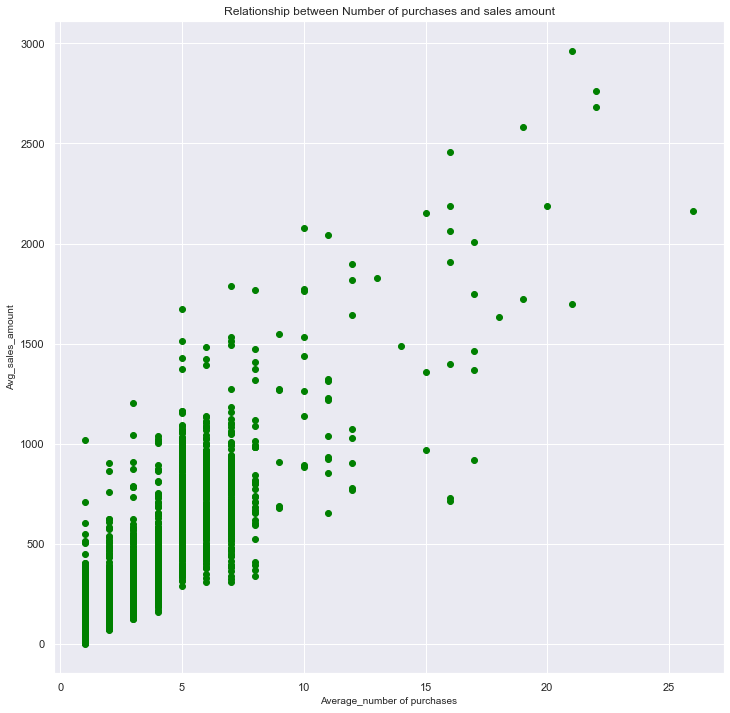

In [9]:
x = Old_customers['Avg_Num_Products_Purchased']
y = Old_customers['Avg_Sale_Amount']
plt.figure(figsize=(12,12))
plt.scatter(x,y, c = 'green')
plt.xlabel('Average_number of purchases', fontsize= 10)
plt.ylabel('Avg_sales_amount',  fontsize= 10)
plt.title('Relationship between Number of purchases and sales amount')

plt.show()


In [10]:
#Creating a simple model with Number of purchases and sales amount
#Predictor variable
x = Old_customers[['Avg_Num_Products_Purchased']]
y = Old_customers['Avg_Sale_Amount']

In [11]:
x.shape

(2375, 1)

In [12]:
y.shape

(2375,)

In [13]:
# Making sure we have fit_intercept as true
lin.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [14]:
#first_model
lin.fit(x,y)

LinearRegression()

In [15]:
#the coeffcent on the single model
lin.coef_

array([106.28018333])

In [16]:
#the y intercept on the single model
lin.intercept_

44.01516316515114

In [17]:
#the r^2 score same as correlation squared
lin.score(x,y)

0.7323152800426009

In [18]:
#Creating dummy variables 
New_tables = pd.get_dummies(Old_customers.Customer_Segment)
Old_customers= Old_customers.join(New_tables)

In [19]:
Old_customers

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,0,0,0,1
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,0,0,0,1
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,0,0,0,1
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6,0,0,0,1
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,Joan Delisa,Credit Card Only,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1,1,0,0,0
2371,Helen Cordiner,Credit Card Only,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4,1,0,0,0
2372,Angela Finley,Credit Card Only,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4,1,0,0,0
2373,Christine Sullivan,Credit Card Only,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7,1,0,0,0


In [20]:
#Making a multiple linear regression model
#predictor variables and making credit card only as baseline
New_var = Old_customers[['Avg_Num_Products_Purchased', 'Loyalty Club Only', 'Loyalty Club and Credit Card', 'Store Mailing List']]
#Target varaiable
y = Old_customers.Avg_Sale_Amount

In [21]:
#Intiating a model
Mul_model = LinearRegression()

In [22]:
Mul_model.fit(New_var, y)

LinearRegression()

In [23]:
#the new model coefficient
Mul_model.coef_

array([  66.97620492, -149.35572194,  281.83876492, -245.4177445 ])

In [24]:
#Showing the coefficient in a dataframe
pd.DataFrame(data=[Mul_model.coef_], columns=['Avg_Num_Products_Purchased', 'Loyalty Club Only', 'Loyalty Club and Credit Card', 'Store Mailing List'])

,Avg_Num_Products_Purchased,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,66.976205,-149.355722,281.838765,-245.417744


In [25]:
#The new model intercept
Mul_model.intercept_

303.46347131467235

In [26]:
#Checking the new rsquared score
Mul_model.score(New_var,y)

0.8368777093556734

In [27]:
#we can check the the comprehensive summary like r using the statsmodel
import statsmodels.api as sm
New_var1 = sm.add_constant(New_var)
#the Ols stands for ordinary least sqaure nethod of regression
result = sm.OLS(y, New_var1).fit()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:09:43   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          303.4635     10.576     28.694      0.000     282.725     324.202
Avg_Num_Products_Purchased      66.9762      1.515     44.208      0.000      64.005      69.947
Loyalty Club Only             -149.3557      8.973    -16.645      0.000    -166.951    -131.760
Loyalty Club and Credit Card   281.8388     11.910     23.664      0.000     258.484     305.194
Store Mailing List            -245.4177      9.768    -25.125      0.000    -264.572    -226.263
==============================================================================
Omnibus:                      359.638   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.580
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# the summary shows that the model is statistically significant

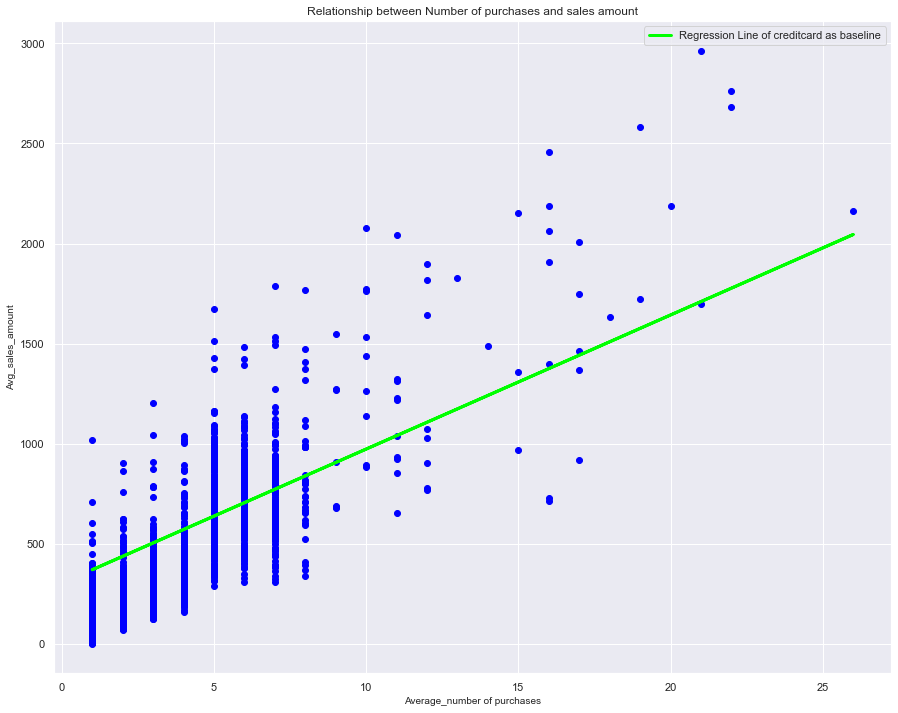

In [29]:
#plot the equation on the the scatter plot
plt.subplots(figsize=(15, 12))
plt.scatter(x,y, c = 'blue')
yhat = 303.4653 + (x*66.9762)
fig = plt.plot(x, yhat, lw=3, c='lime', label = 'Regression Line of creditcard as baseline')

plt.xlabel('Average_number of purchases', fontsize= 10)
plt.ylabel('Avg_sales_amount',  fontsize= 10)
plt.title('Relationship between Number of purchases and sales amount')
plt.legend()
plt.show()


In [30]:
#Making Variable
m = 'Avg_Num_Products_Purchased'
d = 'Avg_Sale_Amount'

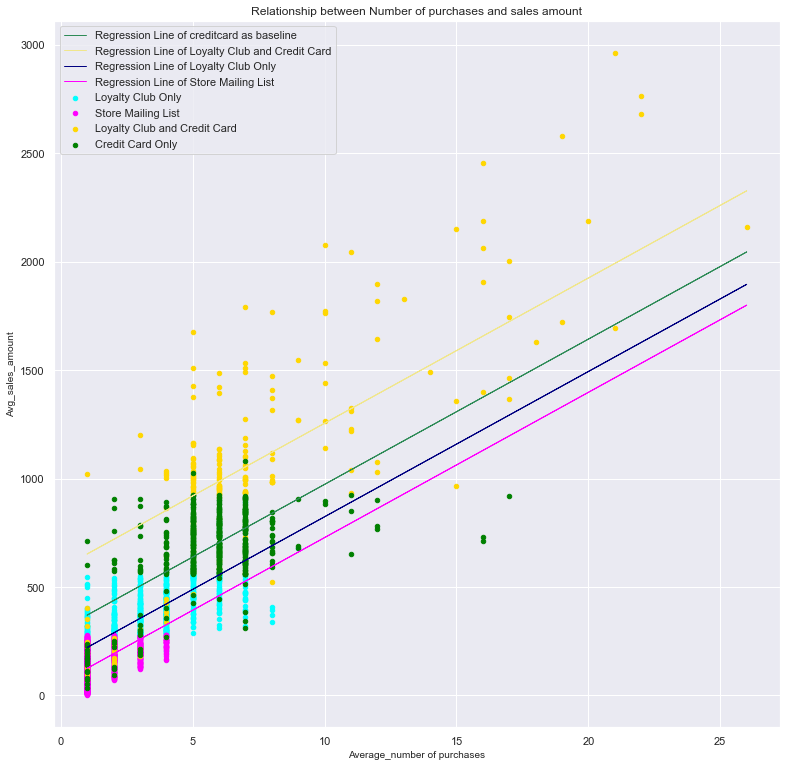

In [31]:
#Showing the different kind of customers on our old customer list
ax1 = Old_customers[Old_customers['Customer_Segment'] == "Loyalty Club Only"].plot(kind = 'scatter', x=m,y=d, c = 'cyan', figsize=(13,13), label = 'Loyalty Club Only')
Old_customers[Old_customers['Customer_Segment'] == "Store Mailing List"].plot(kind='scatter', x=m, y=d, c='magenta', ax =ax1, figsize=(13,13), label = 'Store Mailing List')
Old_customers[Old_customers['Customer_Segment'] == "Loyalty Club and Credit Card"].plot(kind='scatter', x=m, y=d, c='gold', ax =ax1, figsize=(13,13), label = 'Loyalty Club and Credit Card')
Old_customers[Old_customers['Customer_Segment'] == "Credit Card Only"].plot(kind='scatter', x=m, y=d, c='green', ax =ax1, figsize=(13,13), label= 'Credit Card Only')
yhat_C_card = 303.4653 + (x*66.9762)
yhat_LC_CC = 585.3023 + (x*66.9762)
yhat_LC = 154.1078 + (x*66.9762)
yhat_Sml = 58.0458 + (x*66.9762)
fig = plt.plot(x, yhat_C_card, lw=1, c='seagreen', label = 'Regression Line of creditcard as baseline')
fig = plt.plot(x, yhat_LC_CC, lw=1, c='khaki', label = 'Regression Line of Loyalty Club and Credit Card')
fig = plt.plot(x, yhat_LC, lw=1, c='navy', label = 'Regression Line of Loyalty Club Only ')
fig = plt.plot(x, yhat_Sml, lw=1, c='magenta', label = 'Regression Line of Store Mailing List')

plt.title('Relationship between Number of purchases and sales amount')
plt.xlabel('Average_number of purchases', fontsize= 10)
plt.ylabel('Avg_sales_amount',  fontsize= 10)
plt.legend()
plt.show()




In [32]:
#To predict our new data we need to make the categorical data dummy variables as well 
Pre_tables = pd.get_dummies(New_customers.Customer_Segment)
New_customers= New_customers.join(Pre_tables)

In [33]:
New_customers.head(10)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0
5,Amanda Donahoe,Credit Card Only,1946,10093 E Warren Ave,Denver,CO,80247,105,7,0.7,0.732722,0.267278,1,0,0,0
6,Amanda Huerta,Loyalty Club and Credit Card,1212,3889 Aldenbridge Cir,Highlands Ranch,CO,80126,101,4,1.0,0.778261,0.221739,0,0,1,0
7,Angie Reffel,Credit Card Only,369,4502 S Buckley Way,Aurora,CO,80015,104,6,0.2,0.806553,0.193447,1,0,0,0
8,Anh Tran,Credit Card Only,1683,7328 E Maple Ave,Denver,CO,80230,100,6,0.0,0.749342,0.250658,1,0,0,0
9,Anna Crumrine,Loyalty Club Only,1940,7354 S Catawba Way,Aurora,CO,80016,102,4,0.9,0.735477,0.264523,0,1,0,0


In [34]:
#predictor variable for our new customers using the Credit card only as baseline
Predict_x = New_customers[['Avg_Num_Products_Purchased','Loyalty Club Only', 'Loyalty Club and Credit Card', 'Store Mailing List']]
Mul_model.predict(Predict_x)

array([ 355.03636415,  987.15946577,  622.94118384,  288.06015923,
        422.01256907,  772.29690578,  853.20705592,  705.32070085,
        705.32070085,  422.01256907,  191.99813666,  622.94118384,
        422.01256907,  638.34449593,  772.29690578,  355.03636415,
        488.988774  ,  221.0839543 , 2393.65976916,  504.39208608,
        555.96497892,  355.03636415,  555.96497892,  355.03636415,
        555.96497892,  288.06015923,  719.25464608,  638.34449593,
       1389.01669531,  355.03636415,  355.03636415,  772.29690578,
        705.32070085,  258.97434158,  772.29690578, 1255.06428546,
        555.96497892,  638.34449593,  488.988774  ,  689.91738877,
       1121.11187562, 1121.11187562,  288.06015923,  488.988774  ,
       1455.99290023,  705.32070085,  638.34449593,  191.99813666,
        555.96497892,  288.06015923,  355.03636415,  422.01256907,
        504.39208608,  288.06015923,  221.0839543 ,  221.0839543 ,
        772.29690578,  622.94118384,  705.32070085,  422.01256

In [35]:
#To display in a dataframe 
predictions = Mul_model.predict(Predict_x)
Predicted_data = pd.DataFrame(data=predictions, columns = ['Predicted_Avg_sale'])
New_customers = New_customers.join(Predicted_data)

In [36]:
New_customers.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List,Predicted_Avg_sale
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0,355.036364
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0,987.159466
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0,622.941184
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0,288.060159
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0,422.012569


In [37]:
#Dropping the Categorical variable
New_customers.drop(columns=['Credit Card Only', 'Loyalty Club Only', 'Loyalty Club and Credit Card','Store Mailing List'],inplace=True)

In [38]:
#Probability of the new customers buying
New_customers['Prob_Avg_sale'] = New_customers.Predicted_Avg_sale * New_customers.Score_Yes
New_customers.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Predicted_Avg_sale,Prob_Avg_sale
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,355.036364,108.298804
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,987.159466,466.654501
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,622.941184,360.609345
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,288.060159,87.898046
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,422.012569,163.616744


In [39]:
#we can calculate the revenue by summing up the Prob_Avg_sale column
Revenue = sum(New_customers.Prob_Avg_sale)
Revenue

47224.87137309065

In [40]:
#we have an avg_gross margin of 50%
Net_Revenue = Revenue * 0.5
Net_Revenue


23612.435686545326

In [41]:
#We can then calculate the profit by Net_rev - cost of sending the catalogue
Profit = Net_Revenue - 6.50 * len(New_customers.Prob_Avg_sale)
Profit

21987.435686545326

# Since we have a profit of over $10000, I would recommend that the catalogue is sent to the new customers on our mailing list